# Generating panels for Figure S2

In [1]:
import webcolors 
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
def is_significant(mut_tol):
    if mut_tol > 2 :
        return 'HIGH'
    if mut_tol < -2:
        return 'LOW'
    else :
        return 'non significant'


def get_gene_name(x):
    return prot_agg_table[prot_agg_table['proteinID_y'] == x]['gene_name'].values[0]

#### Required inputs

In [3]:
prot_agg_table = pd.read_csv('../../data/aggregation_propensity/HGMM_agg_scores.csv', sep=',')
prot_agg_table['delta_aggregation'] = prot_agg_table['Aggregation_x'] - prot_agg_table['Aggregation_y']
prot_agg_table['delta_agg_z-scores'] = stats.zscore(prot_agg_table['delta_aggregation'])

prot_dom_agg_table = pd.read_csv('../../data/aggregation_propensity/HGMM_dom_agg_scores.csv', sep='\t')
prot_dom_agg_table['delta_dom_aggregation'] = prot_dom_agg_table['dom_agg_score_x'] - prot_dom_agg_table['dom_agg_score_y']
prot_dom_agg_table['delta_dom_agg_z-scores'] = stats.zscore(prot_dom_agg_table['delta_dom_aggregation'])
prot_dom_agg_table['gene_name'] = prot_dom_agg_table['proteinID_y'].apply(get_gene_name)

### Proteins identied from inflammosome complex

In [4]:
inf_cplx = ['Q2LKU9', 'Q9D8T2', 'Q8R4B8', 'P29452', 'Q91WS2', 'Q3UP24', 'O08736']

In [5]:
inf_cplx_prot = prot_agg_table[prot_agg_table['proteinID_y'].isin(inf_cplx)].reset_index(drop=True).sort_values('proteinID_y')

##### Whole-sequence aggregation propensity scores

In [6]:
inf_cplx_prot

,proteinID_x,Aggregation_x,clusterNumber,length_x,proteinID_y,Aggregation_y,length_y,diff_length,gene_name,Pasta_Aggregation_x,Pasta_Aggregation_y,delta_aggregation,delta_agg_z-scores
3,G5BVT9,10.820979,11712,282,O08736,2.913697,419,-137,Casp12,0.354610,0.238663,7.907282,6.037174
5,G5BVT7,7.221335,10638,397,P29452,5.087841,402,-5,Casp1,0.251889,0.248756,2.133494,1.574864
0,G5BW75,5.162457,3653,1328,Q2LKU9,4.752625,1182,146,Nlrp1a,0.075301,0.084602,0.409832,0.242720
2,G5B3Y4,5.586407,3409,947,Q3UP24,4.633564,1024,-77,Nlrc4,0.105597,0.097656,0.952842,0.662389
6,G5C9A8,8.206906,8309,953,Q8R4B8,6.367034,1033,-80,Nlrp3,0.104932,0.096805,1.839872,1.347936
4,G5C470,8.857078,9184,510,Q91WS2,5.889814,869,-359,Nlrp6,0.196078,0.115075,2.967265,2.219249
1,G5AWF6,5.646437,9837,483,Q9D8T2,4.884037,487,-4,Gsdmdc1,0.207039,0.205339,0.762400,0.515205


##### Domain aggregation propensity scores

In [7]:
inf_cplx_dom = prot_dom_agg_table[prot_dom_agg_table['proteinID_y'].isin(inf_cplx)].reset_index(drop=True).sort_values('proteinID_y')

### 1. Distribution of delta aggregration propensity z-scores in inflammasome proteins 
- Top:  Whole-sequence level 
- Bottom: Domain level


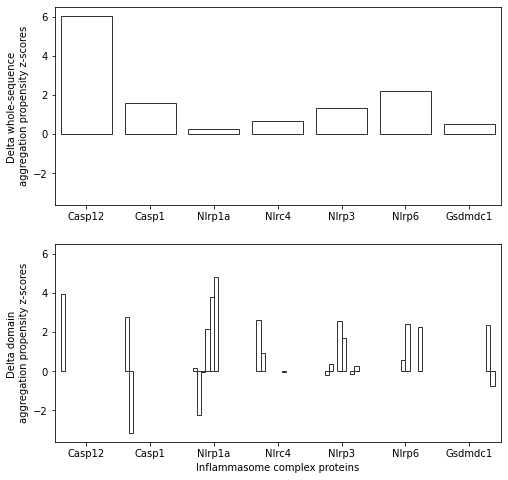

In [10]:
f, axes = plt.subplots(nrows=2, ncols=1, sharey=True, figsize=(8,8))
sns.barplot(data=inf_cplx_prot, y='delta_agg_z-scores', x='gene_name', facecolor=(1, 1, 1, 0), edgecolor=".2", ax=axes[0])
axes[0].set_ylabel('Delta whole-sequence \naggregation propensity z-scores')
axes[0].set_xlabel('')
g = sns.barplot(data=inf_cplx_dom, y='delta_dom_agg_z-scores', x='gene_name', hue='domain_id', facecolor=(1, 1, 1, 0), edgecolor=".2", ax=axes[1], ci=None)
g.legend_.remove()
axes[1].set_ylabel('Delta domain \naggregation propensity z-scores')
axes[1].set_xlabel('Inflammasome complex proteins')

plt.show()
f.savefig('../../figures/revisions/inflammasome_proteins/Figure_S2A.png', dpi=200)

### 2. Distribution of delta aggregation propensity z-scores of shared domains in inflammasome proteins 

PF00619 3


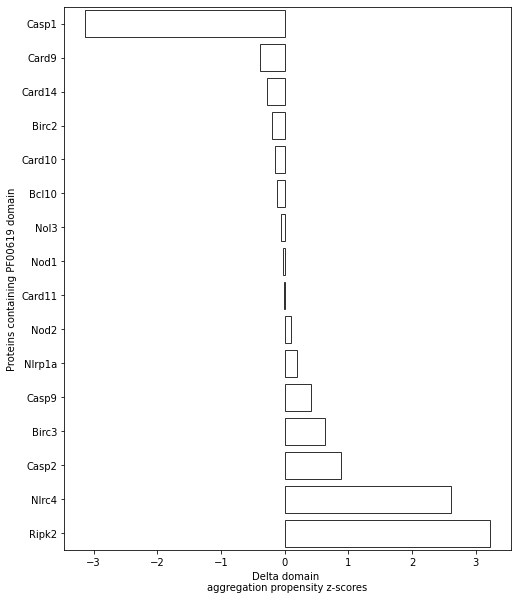

PF00656 2


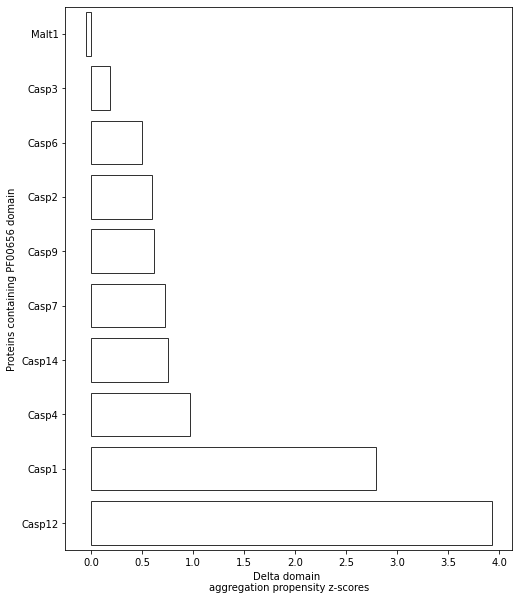

PF02758 2


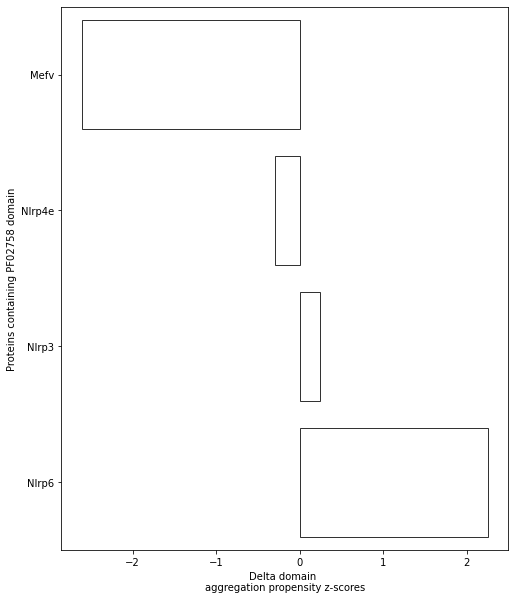

PF05729 3


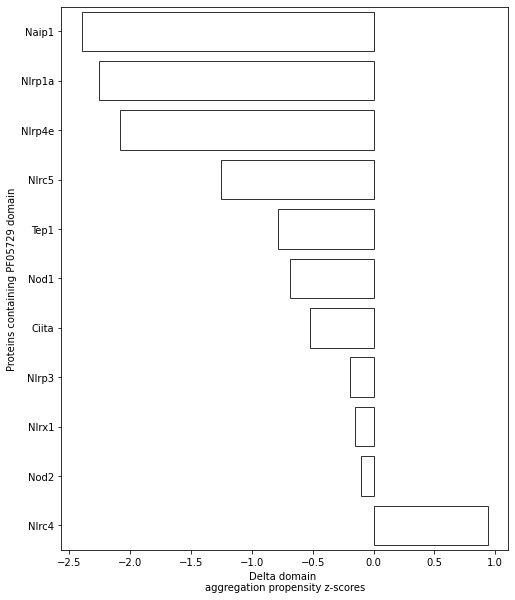

PF13516 6


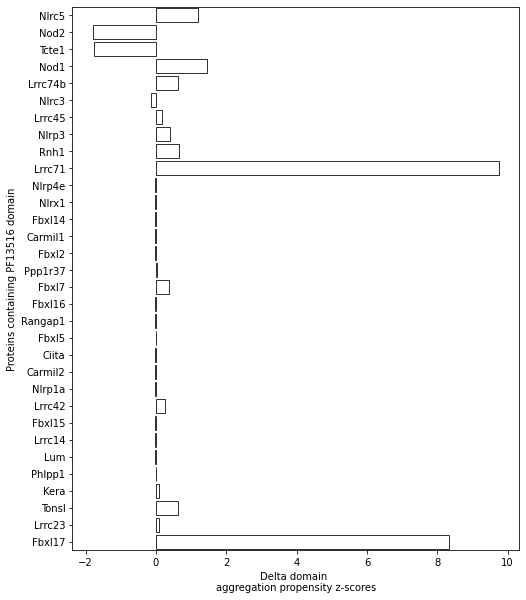

PF17776 3


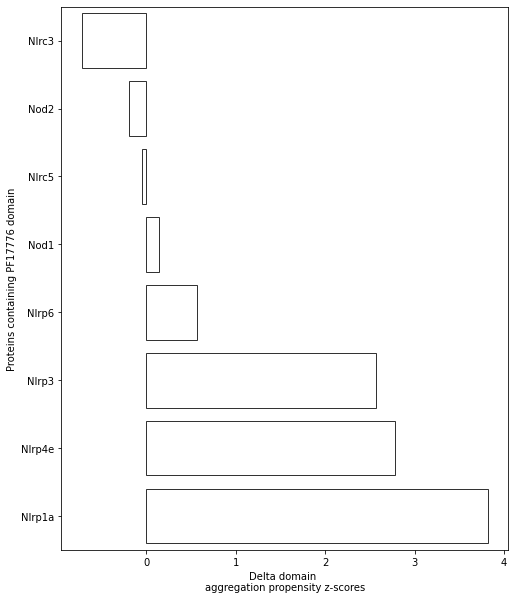

PF17779 3


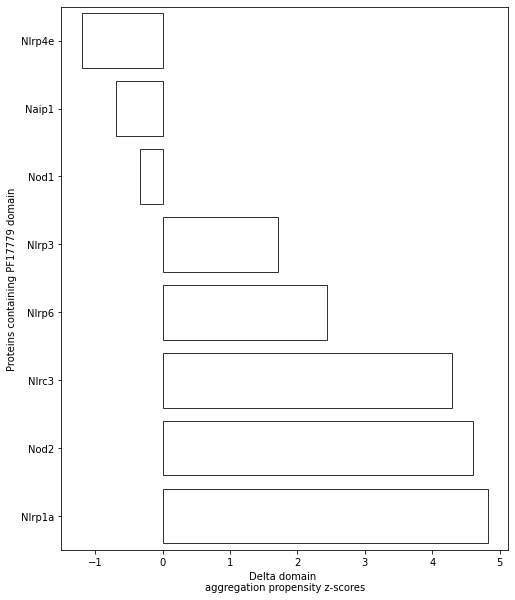

In [11]:
for i in range(len(np.unique(inf_cplx_dom['domain_id'], return_counts=True)[0])):
    domain = np.unique(inf_cplx_dom['domain_id'], return_counts=True)[0][i]
    count = np.unique(inf_cplx_dom['domain_id'], return_counts=True)[1][i]
    if count > 1 :
        g = plt.figure(figsize=(8,10))
        DOM = prot_dom_agg_table[prot_dom_agg_table['domain_id'] == domain] 
        sns.barplot(data=DOM.sort_values('delta_dom_agg_z-scores'), x='delta_dom_agg_z-scores', y='gene_name', facecolor=(1, 1, 1, 0), edgecolor=".2", ci=None)
        plt.xlabel('Delta domain \naggregation propensity z-scores')
        plt.ylabel(f'Proteins containing {domain} domain')
        plt.show()
        g.savefig(f'../../figures/revisions/inflammasome_proteins/Figure_S2_dom_agg_z-scores_{domain}.png', dpi=200)
